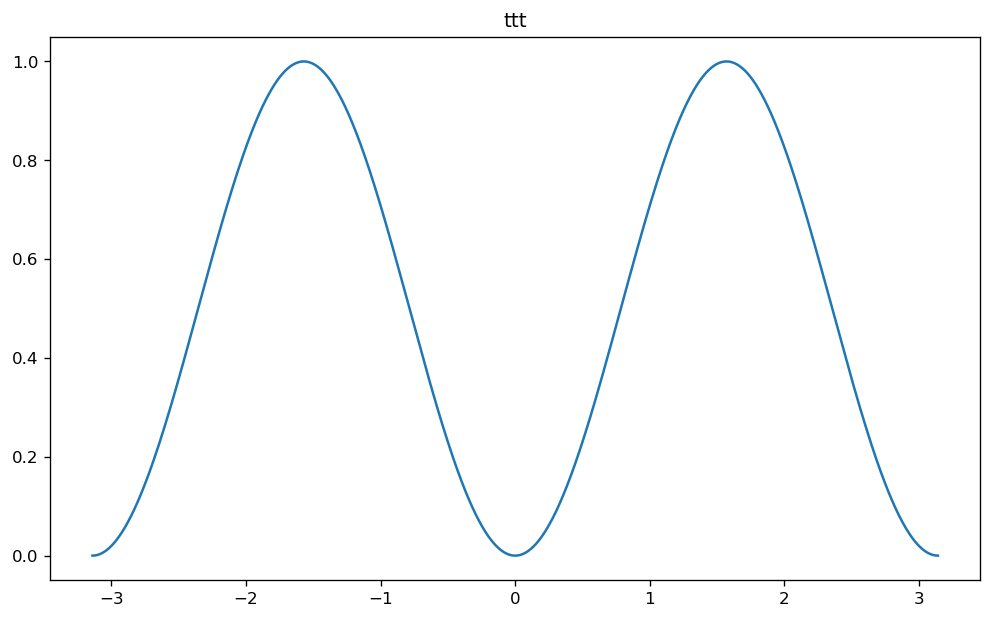

In [1]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt

from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig)
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def f(name, x, freq):
    if name == 'sin':
        return np.sin(freq * x)
    elif name == 'cos':
        return np.cos(freq * x)

def sinus(name='sin', amp=1.0,freq=1.0):
    pn.pane.HTML(f"<p>{name}</p>")
    fig = Figure()
    FigureCanvas(fig)
    x = np.linspace(-np.pi, np.pi)
    y = amp * f(name, x, freq)
    ax = fig.add_subplot(title=name)
    ax.plot(x,y)
    return fig

def sinus2(amp=1.0,freq=1.0):
    fig = Figure(figsize=(3,2), dpi=120)
    x = np.linspace(-np.pi, np.pi)
    y = amp * np.sin(freq * x)
    ax = fig.add_subplot()
    ax.plot(x,y)
    return fig

def sinus3(name='sin', amp=1.0,freq=1.0):
    fig = Figure(figsize=(10,6), dpi=120)
    FigureCanvas(fig)
    x = np.linspace(-np.pi, np.pi,1000)
    y = np.sin(1/amp*freq*x) * np.sin(freq * x)
    ax = fig.add_subplot(title=name)
    ax.plot(x,y)
    return fig

sinus3('ttt',1.0, 1.0)

In [2]:
# import panel as pn
# pn.extension()
# pn.interact(sinus2)

In [7]:
# import panel as pn
# import panel.widgets as pnw

# name  = pnw.Select(name='name', value='sin', options=ddl)
# amp  = pnw.FloatSlider(name='amp', value=1.0, start=0.0, end=5.0)
# freq  = pnw.FloatSlider(name='freq', value=1.0, start=0.0, end=50.0)

# reactive_sinus = pn.bind(sinus3, name, amp, freq)

# widgets   = pn.Column(f"<br>\n# Function", name, amp, freq)
# obj = pn.Row(widgets, reactive_sinus, background='WhiteSmoke')
# obj

In [9]:
# from bokeh.plotting import figure
# p1 = figure(height=200, width=300)
# p2 = figure(height=200, sizing_mode='stretch_width')

# p1.line([1,2,3],[1,2,3])
# p2.circle([1,2,3],[1,2,3])

# pn.Row(p1, p2)

In [2]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None # default warn => SettingWithCopyWarning
from collections import namedtuple
from pprint import (pprint as pp, pformat as pf)
import time
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

import arrow
import dmyplant2
dmyplant2.cred()
mp = dmyplant2.MyPlant(3600)

from dfsm import msgFSM

def sfun(x):
    return all([
            ("Forsa Hartmoor" in str(x['IB Site Name'])), 
            (x['OperationalCondition'] != 'Decommissioned')
        ])

fleet = mp.search_installed_fleet(sfun).drop('index', axis=1)
fleet = fleet.sort_values(by = "Engine ID",ascending=True).reset_index(drop='index')
fleet.T;
ddl = pd.DataFrame(fleet['serialNumber'] + ' - ' + fleet['IB Site Name'] + ' ' + fleet['Engine ID'])[0].to_list()
ddl = [m for m in ddl]

In [3]:
import panel as pn
import panel.widgets as pnw
from bokeh.plotting import figure
from panel.layout.gridstack import GridStack, GridSpec
pn.extension()

def sinus4(name='sin', amp=1.0,freq=1.0):
    fig = figure(title=name, height=800, sizing_mode='stretch_width',margin=5)
    x = np.linspace(-np.pi, np.pi,1000)
    y = np.sin(1/amp*freq*x) * np.sin(freq * x)
    fig.line(x,y)
    return fig

name  = pnw.Select(name='name', value='sin', options=ddl)
amp  = pnw.FloatSlider(name='amp', value=1.0, start=0.0, end=5.0)
freq  = pnw.FloatSlider(name='freq', value=1.0, start=0.0, end=50.0)

reactive_sinus = pn.bind(sinus4, name, amp, freq)
widget1 = pn.Row(name, height=80, margin=0)
widget2 = pn.Column(f"<br>\n# Function", amp, freq, width=300)

gspec = pn.GridSpec(sizing_mode='stretch_both')
gspec[0,0:8] = widget1
gspec[1:12,0] = widget2
gspec[1:12,1:8] = reactive_sinus

gspec

BokehModel(combine_events=True, render_bundle={'docs_json': {'5ef9b8a5-9e2a-4f91-ac32-be16dd19ee10': {'defs': …

GridSpec(ncols=8, nrows=10, sizing_mode='stretch_both')
    [0] Row(height=80, sizing_mode='stretch_both')
        [0] Select(name='name', options=['1486144 - Forsa Hartmoor...], value='1486144 - Forsa H...)
    [1] Column(sizing_mode='stretch_both', width=300)
        [0] Markdown(str)
        [1] FloatSlider(end=5.0, name='amp', value=1.0)
        [2] FloatSlider(end=50.0, name='freq', value=1.0)
    [2] ParamFunction(function, sizing_mode='stretch_both')

In [ ]:
import panel as pn
import panel.widgets as pnw
from bokeh.plotting import figure
from panel.layout.gridstack import GridStack

pn.extension('gridstack')

def sinus4(name='sin', amp=1.0,freq=1.0):
    fig = figure(title=name, sizing_mode='stretch_both')
    x = np.linspace(-np.pi, np.pi,1000)
    y = np.sin(1/amp*freq*x) * np.sin(freq * x)
    fig.line(x,y)
    return fig

name  = pnw.Select(name='name', value='sin', options=ddl)
amp  = pnw.FloatSlider(name='amp', value=1.0, start=0.0, end=5.0)
freq  = pnw.FloatSlider(name='freq', value=1.0, start=0.0, end=50.0)

reactive_sinus = pn.bind(sinus4, name, amp, freq)
widgets   = pn.Column(f"<br>\n# Function", name, amp, freq)

gstack = GridStack(sizing_mode='stretch_both', allow_resize=False, allow_drag=False)
gstack[0:3,  0] = widgets
gstack[1:3,1:3] = reactive_sinus

gstack


In [ ]:
gstack.grid